In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df= pd.read_csv('train.csv')

In [61]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
sns.set_style('whitegrid')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E28B8A6148>]],
      dtype=object)

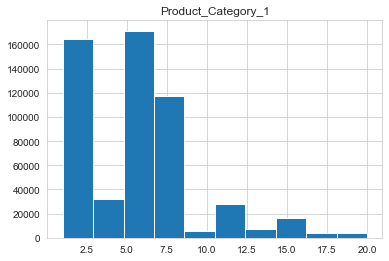

In [6]:
df.hist('Product_Category_1')

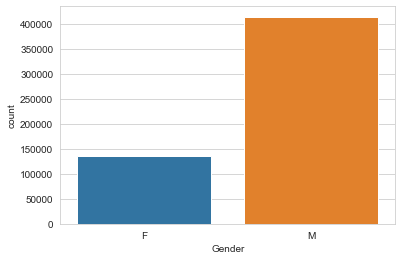

In [7]:
sns.countplot(df['Gender'])

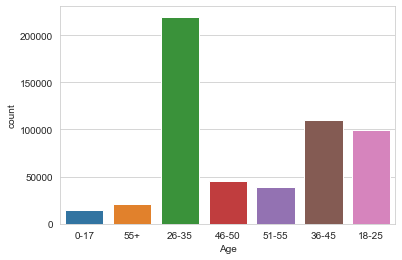

In [8]:
sns.countplot(df['Age'])

In [9]:
df1 =  df.groupby('Age').mean()

In [10]:
df1

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,,,,,,,
0-17,1.002722e+06,8.761025,0.000000,5.083764,9.030334,11.845885,8933.464640
18-25,1.002801e+06,6.736384,0.211880,5.111088,9.470278,12.391142,9169.663606
26-35,1.003113e+06,7.896975,0.392970,5.314272,9.811388,12.647127,9252.690633
36-45,1.003066e+06,8.837365,0.396644,5.494242,9.954625,12.750849,9331.350695
46-50,1.003190e+06,8.517078,0.722326,5.742194,10.176459,12.939958,9208.625697
51-55,1.002985e+06,8.810109,0.718475,5.774214,10.281663,13.105320,9534.808031
55+,1.002986e+06,9.502697,0.633417,6.066313,10.464882,13.151577,9336.280459


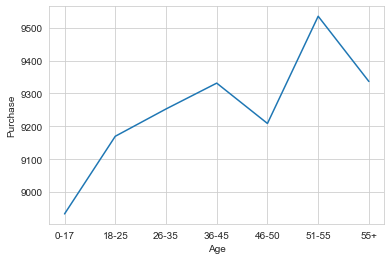

In [11]:
sns.lineplot(x = df1.index , y=  df1['Purchase'] )

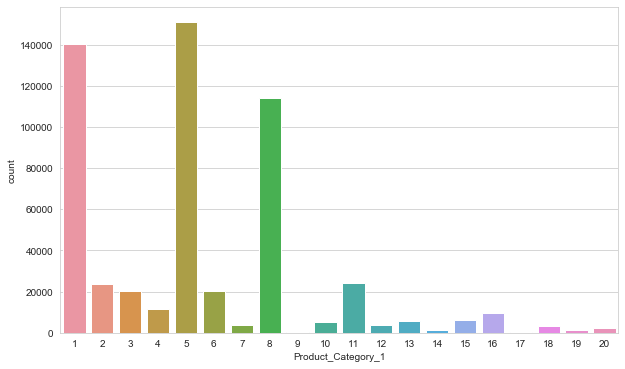

In [12]:
plt.figure(figsize = (10,6))
sns.countplot(x =df['Product_Category_1'] )

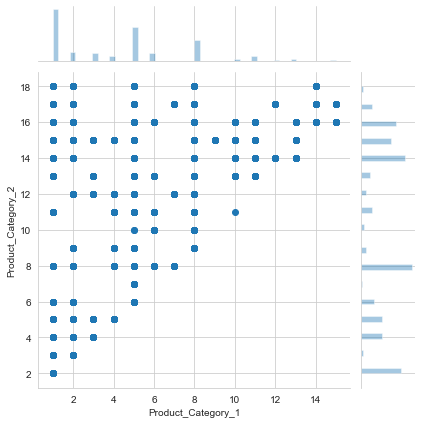

In [117]:
sns.jointplot(x = df['Product_Category_1'] , y = df['Product_Category_2'])

In [194]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Data Processing

In [100]:
df_final = pd.get_dummies(df, columns = ['Gender'] , drop_first = True)
#df_final.drop(columns = ['Product_Category_2','Product_Category_3'] , axis = 1 , inplace = True )

In [40]:
df_final.head()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M
0,1000001,P00069042,0-17,10,A,2,0,3,NaN,NaN,8370,0
1,1000001,P00248942,0-17,10,A,2,0,1,6.0,14.0,15200,0
2,1000001,P00087842,0-17,10,A,2,0,12,NaN,NaN,1422,0
3,1000001,P00085442,0-17,10,A,2,0,12,14.0,NaN,1057,0
4,1000002,P00285442,55+,16,C,4+,0,8,NaN,NaN,7969,1


In [ ]:
df_final.iloc[:,7]

In [ ]:
for i in range(0,df_final.shape[0]):
    if df_final.iloc[:,9].isnull()[i]:
        if df_final.iloc[:,8].isnull()[i]:
            continue
        else:
            df_final.at[i,'Product_Category_2'] = df_final.iloc[:,8][i] + 1

In [44]:
df_final['Product_Category_2'] = [(df_final.iloc[:,7][i] + 1) if df_final.iloc[:,8].isnull()[i] == True else df_final.iloc[:,8][i] for i in range(0,len(df_final))]
df_final['Product_Category_3'] = [(df_final.iloc[:,8][i] + 1) if df_final.iloc[:,9].isnull()[i] == True else df_final.iloc[:,9][i] for i in range(0,len(df_final))]

In [5]:
df_final['Product_Category_2'] = df_final['Product_Category_2'].fillna(value = df_final['Product_Category_2'].mean())

In [6]:
df_final['Product_Category_3'] = df_final['Product_Category_3'].fillna(value = df_final['Product_Category_3'].mean())

In [101]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  Gender_M                    550068 non-null  uint8  
dtypes: float64(2), int64(5), object(4), uint8(1)
memory usage: 46.7+ MB


In [47]:
#df_final['Age_dum'] = df_final['Age'].apply(age)

In [109]:
df_final['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(lambda x : 4 if x == '4+' else  x )

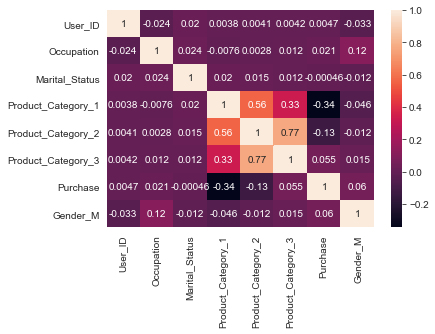

In [65]:
sns.set_style('whitegrid')
sns.heatmap(df_final.corr(),annot = True)

In [110]:
x = df_final.drop(columns = ['User_ID','Product_ID','Purchase','Product_Category_2','Product_Category_3'])
y = df_final['Purchase']

In [111]:
x.head()

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Gender_M
0,0-17,10,A,2,0,3,0
1,0-17,10,A,2,0,1,0
2,0-17,10,A,2,0,12,0
3,0-17,10,A,2,0,12,0
4,55+,16,C,4,0,8,1


In [79]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

In [112]:
x['Age'] = labelencoder_x.fit_transform(x['Age'])
x['City_Category'] = labelencoder_x.fit_transform(x['City_Category'])

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import numpy as np

In [113]:
x_train, x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 42)

In [27]:
def get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    return(mae)

In [28]:
for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850]:
    my_mae = get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  3787
Max leaf nodes: 50  		 Mean Absolute Error:  2983
Max leaf nodes: 100  		 Mean Absolute Error:  2957
Max leaf nodes: 300  		 Mean Absolute Error:  2936
Max leaf nodes: 500  		 Mean Absolute Error:  2930
Max leaf nodes: 700  		 Mean Absolute Error:  2925
Max leaf nodes: 800  		 Mean Absolute Error:  2924
Max leaf nodes: 850  		 Mean Absolute Error:  2923


# RandomForestRegressor

In [114]:
rf = RandomForestRegressor(max_leaf_nodes = 700 , random_state = 0 )

In [115]:
rf.fit(x_train , y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=700,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [116]:
predictions = rf.predict(x_test)

In [117]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2228.1197562309553
MSE: 8782883.335613323
RMSE: 2963.592977386288


# LinearRegression

In [61]:
lr = LinearRegression()

In [62]:
lr.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
lr_predictions = lr.predict(x_test)

In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, lr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_predictions)))

MAE: 3511.3160217442164
MSE: 21158686.144301463
RMSE: 4599.857187381089


# Final Submission

In [90]:
df_test = pd.read_csv('test.csv')

In [91]:
df_test_final = pd.get_dummies(df_test, columns = ['Gender'] , drop_first = True)

In [92]:
df_test_final['Product_Category_2'] = [(df_test_final.iloc[:,7][i] + 1) if df_test_final.iloc[:,8].isnull()[i] == True else df_test_final.iloc[:,8][i] for i in range(0,len(df_test_final))]
df_test_final['Product_Category_3'] = [(df_test_final.iloc[:,8][i] + 1) if df_test_final.iloc[:,9].isnull()[i] == True else df_test_final.iloc[:,9][i] for i in range(0,len(df_test_final))]

In [93]:
df_test_final['Stay_In_Current_City_Years'] = df_test_final['Stay_In_Current_City_Years'].apply(lambda x : 4 if x == '4+' else  x )

In [94]:
df_test_final['Age'] = labelencoder_x.fit_transform(df_test_final['Age'])
df_test_final['City_Category'] = labelencoder_x.fit_transform(df_test_final['City_Category'])

In [95]:
df_test_final.head()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M
0,1000004,P00128942,4,7,1,2,1,1,11.0,12.0,1
1,1000009,P00113442,2,17,2,0,0,3,5.0,6.0,1
2,1000010,P00288442,3,1,1,4,1,5,14.0,15.0,0
3,1000010,P00145342,3,1,1,4,1,4,9.0,10.0,0
4,1000011,P00053842,2,1,2,1,0,4,5.0,12.0,0


In [97]:
x_analytics_test = df_test_final.drop(columns = ['User_ID','Product_ID'])

In [98]:
submission = rf.predict(x_analytics_test)

In [99]:
submission_final = pd.DataFrame({'Purchase':submission , 'User_ID': df_test_final['User_ID'] , 'Product_ID': df_test_final['Product_ID']})
pd.DataFrame(submission_final).to_csv('C:\\Users\\surya.teja\\Downloads\\analytics vidhya\\submission.csv',index = False , header = True)